In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
X = pd.read_csv('/content/gdrive/MyDrive/Classroom/Engineering Physics, Chemistry and Biology Batch 2/AI/18PCB101J-2021/LAB/Titanic_train.csv')
X.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
X.shape

(891, 12)

In [ ]:
y=X.PassengerId
y=np.array(y)
x=X.drop('PassengerId',axis=1)
x=x.drop('Ticket',axis=1)
x=np.array(x)
print(y)
print(x)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [ ]:
#function to impute missing values in age colum based on class
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    return int(X[X["Pclass"] == Pclass]["Age"].mean())
  else: 
      return Age

In [ ]:
X["Age"] = X[["Age", "Pclass"]].apply(impute_age, axis = 1)

In [ ]:
most_common_value = 'S'
for data in X:
  X["Embarked"] = X["Embarked"].fillna(most_common_value)
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
#convert categorical variables into Dummy variables
sex = pd.get_dummies(X["Sex"], drop_first = True)
embark = pd.get_dummies(X["Embarked"], drop_first = True)
pclass = pd.get_dummies(X["Pclass"], drop_first = True)

In [ ]:
X.drop('Sex', inplace = True, axis = 1)
X.drop('Cabin', inplace = True, axis = 1)
X.drop('Embarked', inplace = True, axis = 1)
X.drop('Name', inplace = True, axis = 1)
X.drop('Ticket', inplace = True, axis = 1)
X.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
x = X.drop('Survived', axis = 1)
y = X['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 50)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
linreg = LinearRegression()
linreg.fit(x_train, y_train)
print("Coefficients: ", linreg.coef_)
print("Intercept: ", linreg.intercept_) #y intercept


Coefficients:  [ 4.52667291e-06 -2.18228916e-01 -7.72521804e-03 -3.98737015e-02
  2.98444391e-02  9.20329393e-04]
Intercept:  1.0798159131525535


In [ ]:
print("Accuracy score for training Data", linreg.score(x_train, y_train))
print("Accuracy score for testing Data", linreg.score(x_test, y_test))

Accuracy score for training Data 0.1724003543117768
Accuracy score for testing Data 0.15605601614749665


In [ ]:
lassoreg = Lasso()
lassoreg.fit(x_train, y_train)
print("Accuracy score for training data", lassoreg.score(x_train,y_train))
print("Accuracy score for test Data", lassoreg.score(x_test,y_test))

Accuracy score for training data 0.07512440276427679
Accuracy score for test Data 0.041288341843684684


In [ ]:
# Logistic Regression 3-class Classifier
from sklearn.linear_model import LogisticRegression
# Fitting Logistic Regression to the Training set :
classifier = LogisticRegression(random_state = 50)
classifier.fit(x_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)
# Predict probabilities
probs_y=classifier.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<20}".format("y_test", "y_pred", "class_0(%)", "class_1(%)", "class_2(%)\n")
#res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<20}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,1]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | class_0(%) | class_1(%)    | class_2(%)
         1          | 1          | 0.37       | 0.63          | 0.63                
1          | 0          | 0.61       | 0.39          | 0.39                
0          | 0          | 0.73       | 0.27          | 0.27                
1          | 1          | 0.02       | 0.98          | 0.98                
0          | 0          | 0.63       | 0.37          | 0.37                
1          | 1          | 0.4        | 0.6           | 0.6                 
0          | 0          | 0.87       | 0.13          | 0.13                
0          | 0          | 0.75       | 0.25          | 0.25                
1          | 1          | 0.27       | 0.73          | 0.73                
1          | 0          | 0.76       | 0.24          | 0.24                
1          | 0          | 0.62       | 0.38          | 0.38                
1          | 0          | 0.59       | 0.41          | 0.41                
0          | 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Making the Confusion Matrix :
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[150  12]
 [ 68  38]]


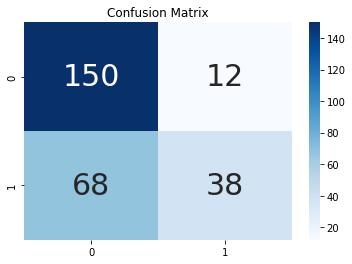

In [ ]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Survivors')

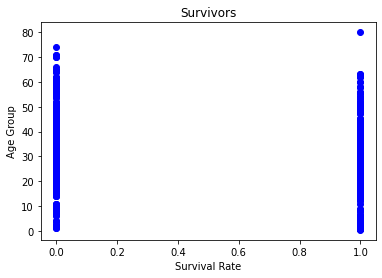

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#scatterplot
plt.scatter (X['Survived'], X['Age'], color = 'blue')
plt.xlabel('Survival Rate')
plt.ylabel('Age Group')
plt.title('Survivors')